In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


To hypothesis to prove inbetween the variables:
x:
Family instrumental support expectations (T1)
Family relational support expectations (T1)
Family role overload (T1) 
Family emotional demands (T1) 

y:
Family role adjustment(T1) 


The columns from above depicts the image in the paper, which translates to the following columns on the data:


x
(positive)
faminstexp1
famallexp1


(negative)
froleover1
femotdem1

y:
fadj1

In [58]:


# Step 1: Load the CSV
file_path = "test.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specify the columns you want to keep for ML
selected_columns = ['average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem','average_fadj']  
filtered_data = data[selected_columns]

In [59]:
correlation_matrix = filtered_data.corr(method='pearson')  # Use 'spearman' for ranked data
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                     average_faminstexp  average_famallexp  average_froleover  \
average_faminstexp            1.000000           0.411601           0.409016   
average_famallexp             0.411601           1.000000           0.152041   
average_froleover             0.409016           0.152041           1.000000   
average_femotdem              0.637376           0.148969           0.558809   
average_fadj                  0.245824           0.473396           0.004045   

                    average_femotdem  average_fadj  
average_faminstexp          0.637376      0.245824  
average_famallexp           0.148969      0.473396  
average_froleover           0.558809      0.004045  
average_femotdem            1.000000      0.100989  
average_fadj                0.100989      1.000000  


In [60]:
# Features and target
X = filtered_data.drop(columns=['average_fadj'])
y = filtered_data['average_fadj']


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.55


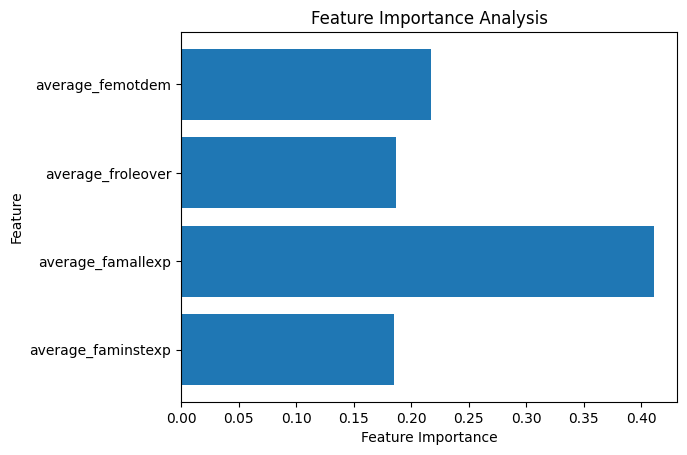

In [62]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [63]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,500,700],
    'max_depth': [None, 5, 10,15,20],
    'min_samples_split': [2, 5,7],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Mean Squared Error: 0.49


Updating the hyperpameters to the best possible set of values:

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Mean Squared Error: 0.49

Reason being the current value of Mean Squared Error: 0.55

and after the grid search the possible mse value has dropped to Tuned Mean Squared Error: 0.49


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=2, min_samples_split=2,n_estimators=500)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.49


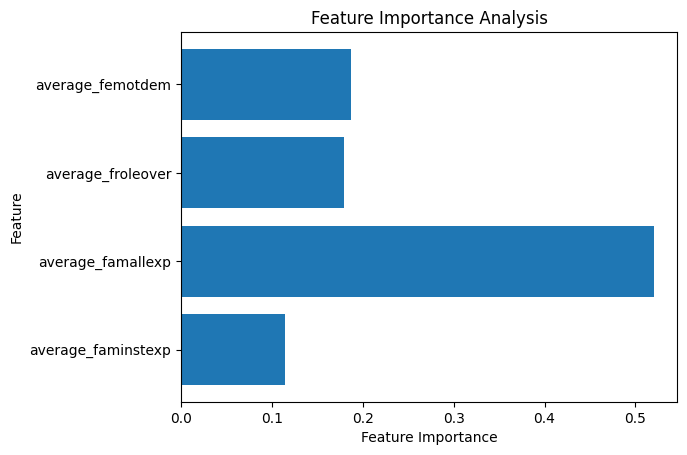

In [65]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [66]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.51


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [67]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.33


Correlation Analysis
Your goal is to prove a correlation between the survey questions (features) and the outcome variable (workadj1). 

Feature Importance (Correlation Proxy)

Random Forests provide a measure of feature importance, which acts as a proxy for correlation.
Highly important features contribute more to predictions and are thus more strongly correlated with workadj1.
If you have already calculated feature importances:

In [68]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


              Feature  Importance
1   average_famallexp    0.519965
3    average_femotdem    0.186409
2   average_froleover    0.178814
0  average_faminstexp    0.114811


Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [70]:
correlations = X.join(y).corr()['average_fadj']
print(correlations.sort_values(ascending=False))


average_fadj          1.000000
average_famallexp     0.473396
average_faminstexp    0.245824
average_femotdem      0.100989
average_froleover     0.004045
Name: average_fadj, dtype: float64


Summary
Strong Correlation:

The model's relatively low MSE (compared to the 1-5 range of your data) indicates that the features (survey responses) correlate well with workadj1.
Balanced Learning:

The consistent error across training, cross-validation, and testing suggests the model generalizes well and is not overfitting.
Key Drivers:

Feature importance and correlation analysis can identify which questions (or combinations) contribute most to the predictions.  

In [71]:
!pip install shap



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

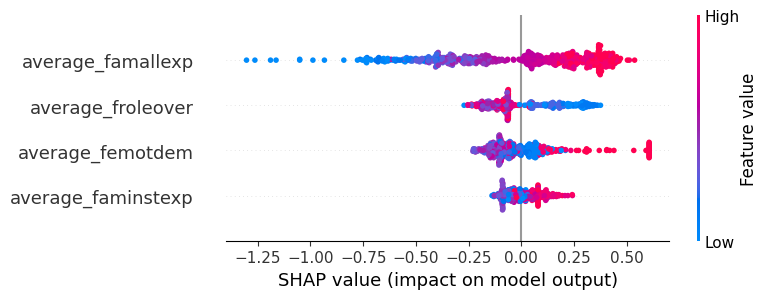

In [72]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


Summary Plot: Displays the average impact of each feature across all predictions.
Dependence Plot: Visualizes the relationship between a single feature and the target:



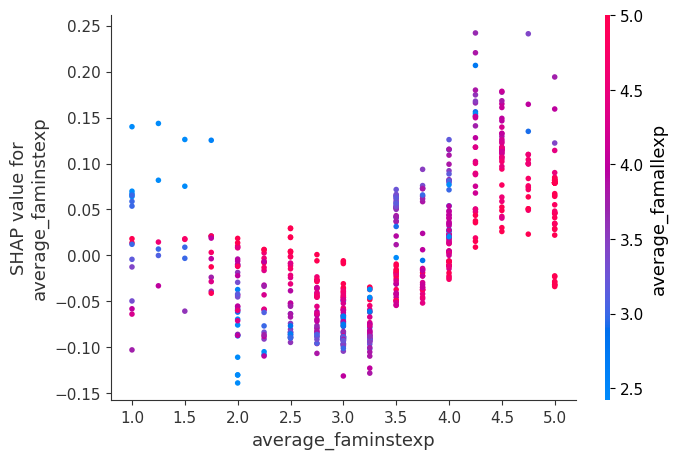

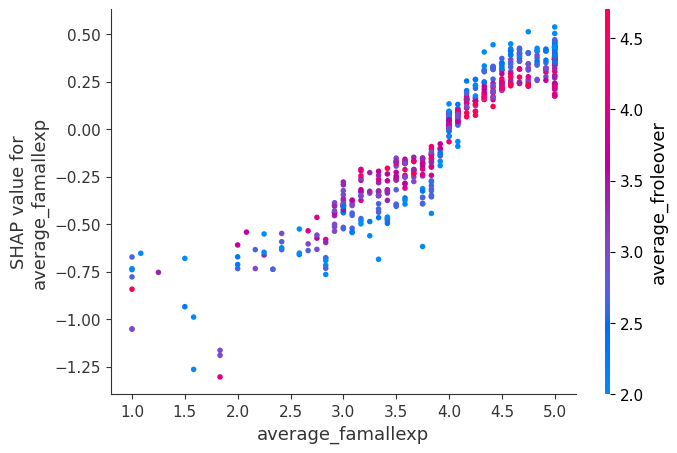

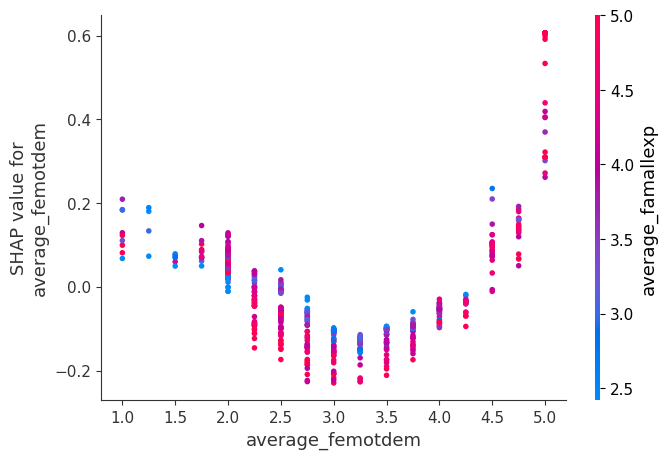

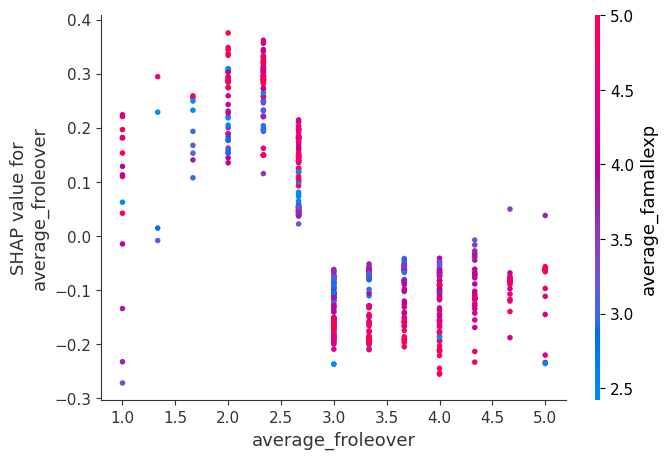

In [73]:
shap.dependence_plot('average_faminstexp', shap_values, X)
shap.dependence_plot('average_famallexp', shap_values, X)
shap.dependence_plot('average_femotdem', shap_values, X)

shap.dependence_plot('average_froleover', shap_values, X)



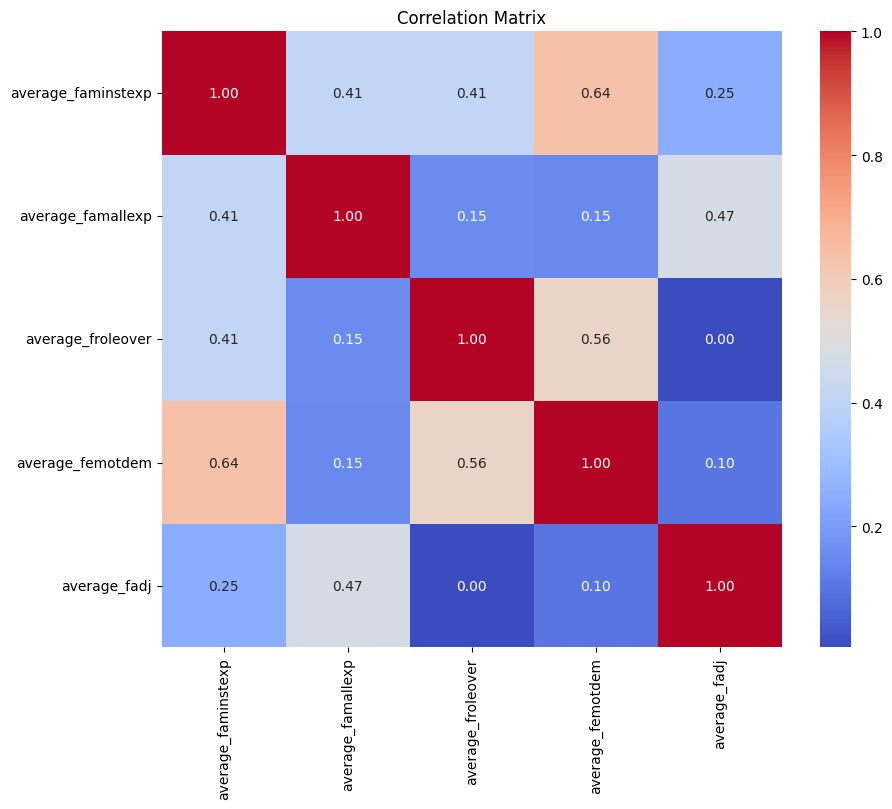

In [74]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


x
(positive)
faminstexp1
famallexp1


(negative)
froleover1
femotdem1

y:
fadj1

In [75]:
import pandas as pd

# Assuming `data` is your DataFrame and `target` is the name of the target column
correlation_matrix = filtered_data.corr()

# Extract correlation of each feature with the target
correlation_with_target = correlation_matrix["average_fadj"].sort_values(ascending=False)
print(correlation_with_target)


average_fadj          1.000000
average_famallexp     0.473396
average_faminstexp    0.245824
average_femotdem      0.100989
average_froleover     0.004045
Name: average_fadj, dtype: float64


In [76]:
import pandas as pd

# Assuming `data` is your DataFrame with features and target
correlations = filtered_data.corr()["average_fadj"].sort_values(ascending=False)

# Display correlation of each feature with the target
print("Correlation of features with average_fadj:")
print(correlations)


Correlation of features with average_fadj:
average_fadj          1.000000
average_famallexp     0.473396
average_faminstexp    0.245824
average_femotdem      0.100989
average_froleover     0.004045
Name: average_fadj, dtype: float64


Correlation Results:
fadj1: Correlation of 1 with itself, as expected.
femotdem1: Correlation of 0.2982 — This indicates a moderate positive relationship with fadj1. As femotdem1 increases, fadj1 tends to increase as well, but the relationship is not extremely strong.
famallexp1: Correlation of 0.2782 — Another moderate positive correlation. As famallexp1 increases, fadj1 also tends to increase, but the strength of the relationship is again moderate.
faminstexp1: Correlation of 0.2067 — This suggests a weak positive relationship. The increase in faminstexp1 is slightly associated with an increase in fadj1, but the relationship is weak.
froleover1: Correlation of -0.0547 — This indicates a very weak negative relationship with fadj1. There is almost no relationship between froleover1 and fadj1, and any small changes in froleover1 are not likely to meaningfully affect fadj1.
Conclusion:
Positive Relationships: femotdem1, famallexp1, and faminstexp1 show moderate to weak positive correlations with fadj1, meaning they increase as fadj1 increases, although the relationship is not very strong.
Negative Relationship: froleover1 has a very weak negative correlation with fadj1, indicating no significant inverse relationship.
Weak Relationships: The correlations are relatively weak overall, meaning that while these features do have some relationship with fadj1, they are not very strong predictors on their own.

prove each individual relation

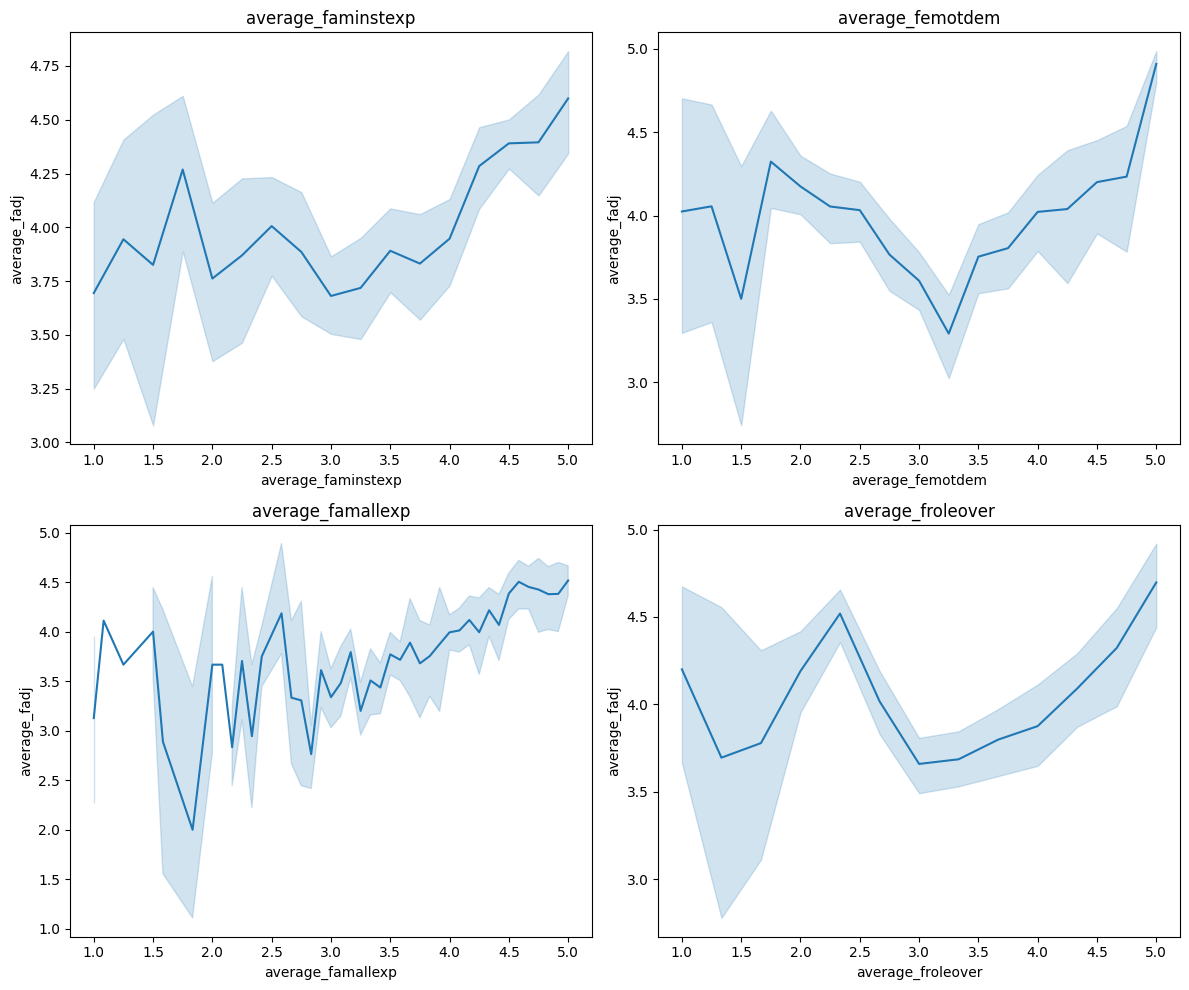

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ['average_faminstexp', 'average_femotdem', 'average_famallexp', 'average_froleover']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("average_fadj")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()



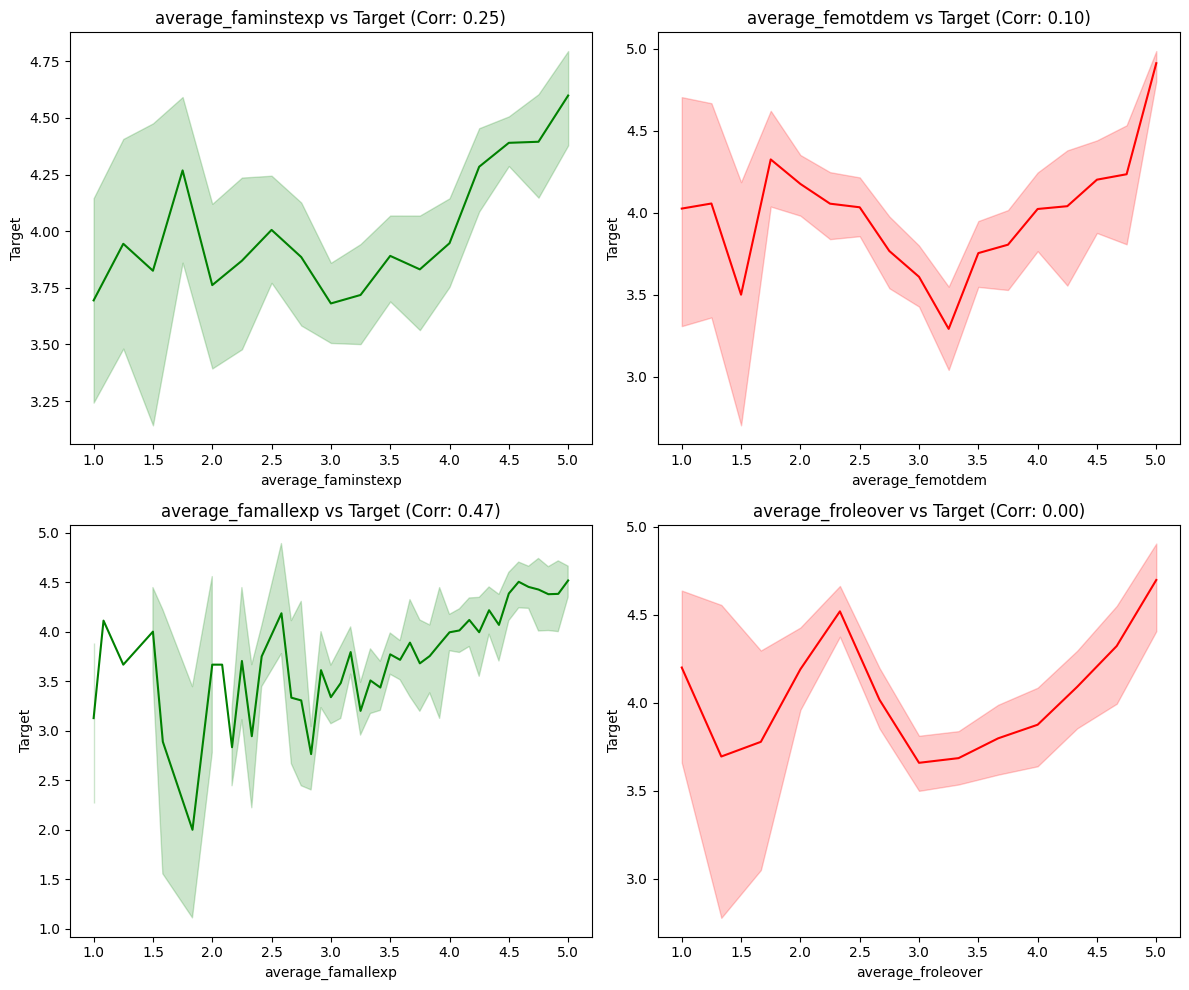

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ['average_faminstexp', 'average_femotdem', 'average_famallexp', 'average_froleover']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.2:
        color = 'green'  # Positive correlation
    elif corr < 0.2:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()
